# Beginner's Python — Session 7 + 8 Biochemistry Answers

In [745]:
#Import some modules.
import numpy as np
import matplotlib.pyplot as plt
import ast
import rdkit
import urllib
import os
from IPython.display import Image
from tqdm.notebook import tqdm

In [746]:
# Install RDKit - For Google Colab.
!pip install kora
import kora.install.rdkit

## **Building and Manipulating Dictionaries**

**As covered in session 5 + 6, mRNA has a start codon ('AUG') and stop codons ('UAG', 'UAA', and 'UGG'). Create a dictionary called `markers` contaning `'start'` and `'stop'` as keys, and the codons as values.**

**HINT:** You can't have multiple instances of the same key, instead store multiple values as a list tied to said key.

In [747]:
# Create a dictionary called `markers`.
markers = {
    'start': 'AUG',
    'stop': ['UAG','UAA', 'UGG']
}

**Print the dictionary**

In [748]:
# Print the dictionary.
print(markers)

{'start': 'AUG', 'stop': ['UAG', 'UAA', 'UGG']}


**Print the 2nd stop codon from the `markers` dictionary.**

**TIP:** When assigning multiple values to a key, the values are stored in a list. Therefore, access using `[relevant index]` as seen before. Multiple square brackets may be required.

In [749]:
# Print the value for the 2nd stop codon.
print(markers['stop'][1])

UAA


**There was an error in one of the stop codons. The codon `'UGG'` is meant to be `'UGA'`. Correct this error by reassigning the value for the relevant index of the `'stop'` key in the cell below. Print that index to confirm the changes.**

In [750]:
# Replace the incorrect codon with the correct one.
markers['stop'][2] = 'UGA'

In [751]:
# Print the index value you corrected.
print(markers['stop'][2])

UGA


## **DNA Sequencer pt.III**

### **Extracting an mRNA sequence**

**Isolating the coding regions of mRNA is extremely important in sequencing, below is code that isolates the coding regions of a given sequence. The line: `start = dna.find()` is incomplete, within the brackets should be the 3-letter start codon. Instead of just typing out `'AUG'`in string format, extract the string from the `markers` dictionary defined above.**

In [752]:
# Function
def sequence_extract(dna):
    
    if not isinstance(dna,str):
        raise TypeError('Input must be in tring format')
    
    new = []
    start = dna.find(markers['start'])
    
    for i in range(start+3, len(dna)):
        if dna[i:i+3] == "UAG" or dna[i:i+3] == "UAA" or dna[i:i+3] == "UGA":
            break
        else:
            new.append(str(dna[i]))  
            
    for i in range(0, len(new)):
        print(new[i], end = '')

In [753]:
# Use this short DNA string to test the function
dna1 = "AAAAUGUGCGGUGCGAAAUGCACGGCGAAAACGAAAAAAAAAUAG"
error = 54000

**Edit the `sequence_extract()` function to raise a `TypeError` when the input is not in the string format, choose an error message of your liking. Then run the function on the `error` value.**

In [754]:
sequence_extract(error)

TypeError: Input must be in tring format

**Test the function on `dna1`.**

In [755]:
sequence_extract(dna1)

UGCGGUGCGAAAUGCACGGCGAAAACGAAAAAAAAA

### **mRNA sequene to amino acid sequence**

**In the cell below a dictionary containing codons and the amino acid they code for has been stored as `dictionary`. Run `ast.literal_eval()` on `dictionary` and immediately store the result as a variable called `codons`. This allows the .txt file to be read by python as a dictionary rather than just as a string.**

In [756]:
# Underneath,run ast.literal_eval() on `dictionary`.
with open('biochem_resources/mRNA.txt', 'r') as f:
    dictionary = f.read()
    
codons = ast.literal_eval(dictionary)

**To test the `codons` dictionary, print the value for the key `'AAA'`, this will be the amino acid called by it.**

In [757]:
# Print value for "AAA" codon.
print(codons['AAA'])

K


**Loop through the `codons` dictionary, printing both the keys and values.**

**BONUS:** Add the `end = "(your separator of choice)"` argument to your print statement to keep the result compact.

In [758]:
# Loop through the `codons` dictionary.
for codon, amino in codons.items():
    print(codon, "codes for ", amino,end = '  -  ')

AAA codes for  K  -  AAC codes for  N  -  AAG codes for  K  -  AAU codes for  N  -  ACA codes for  T  -  ACC codes for  T  -  ACG codes for  T  -  ACU codes for  T  -  AGA codes for  R  -  AGC codes for  S  -  AGG codes for  R  -  AGU codes for  S  -  AUA codes for  I  -  AUC codes for  I  -  AUG codes for  M  -  AUU codes for  I  -  CAA codes for  Q  -  CAC codes for  H  -  CAG codes for  Q  -  CAU codes for  H  -  CCA codes for  P  -  CCC codes for  P  -  CCG codes for  P  -  CCU codes for  P  -  CGA codes for  R  -  CGC codes for  R  -  CGG codes for  R  -  CGU codes for  R  -  CUA codes for  L  -  CUC codes for  L  -  CUG codes for  L  -  CUU codes for  L  -  GAA codes for  E  -  GAC codes for  D  -  GAG codes for  E  -  GAU codes for  D  -  GCA codes for  A  -  GCC codes for  A  -  GCG codes for  A  -  GCU codes for  A  -  GGA codes for  G  -  GGC codes for  G  -  GGG codes for  G  -  GGU codes for  G  -  GUA codes for  V  -  GUC codes for  V  -  GUG codes for  V  -  GUU codes for

**The below function, `translate()` takes an mRNA sequence and returns the amino acid sequence by referencing the `codons` dictionary.**

In [759]:
# Run this cell.
def translate(seq): 
       
    table = codons
    
    aa_sequence = "" 
    if len(seq)%3 == 0: 
        for i in range(0, len(seq), 3): 
            codon = seq[i:i + 3] 
            aa_sequence += table[codon] 
            
    return aa_sequence 

**The function `read_seq` reads .txt files and extracts their contents. Replace `"\n"` with `""`, this has already been similarly done for `\r`.**

In [760]:
# Replace all "\n" (newlines) in the .txt document and replace with "".
def read_seq(inputfile): 
    with open(inputfile, "r") as f: 
        seq = f.read() 
    seq = seq.replace("\n", "") 
    seq = seq.replace("\r", "") 
    return seq 

**Run the `read_seq` function on the `'biochem_resources/opioid_receptor_mrna.txt'` file.**

In [761]:
# Run `read_seq` on the file directory given above.
read_seq('biochem_resources/opioid_receptor_mrna.txt')

'AUGGAUAGCAGCGCGGCGCCGACCAACGCGAGCAACUGCACCGAUGCGCUGGCGUAUAGCAGCUGCAGCCCGGCGCCGAGCCCGGGCAGCUGGGUGAACCUGAGCCAUCUGGAUGGCAACCUGAGCGAUCCGUGCGGCCCGAACCGCACCGAUCUGGGCGGCCGCGAUAGCCUGUGCCCGCCGACCGGCAGCCCGAGCAUGAUUACCGCGAUUACCAUUAUGGCGCUGUAUAGCAUUGUGUGCGUGGUGGGCCUGUUUGGCAACUUUCUGGUGAUGUAUGUGAUUGUGCGCUAUACCAAAAUGAAAACCGCGACCAACAUUUAUAUUUUUAACCUGGCGCUGGCGGAUGCGCUGGCGACCAGCACCCUGCCGUUUCAGAGCGUGAACUAUCUGAUGGGCACCUGGCCGUUUGGCACCAUUCUGUGCAAAAUUGUGAUUAGCAUUGAUUAUUAUAACAUGUUUACCAGCAUUUUUACCCUGUGCACCAUGAGCGUGGAUCGCUAUAUUGCGGUGUGCCAUCCGGUGAAAGCGCUGGAUUUUCGCACCCCGCGCAACGCGAAAAUUAUUAACGUGUGCAACUGGAUUCUGAGCAGCGCGAUUGGCCUGCCGGUGAUGUUUAUGGCGACCACCAAAUAUCGCCAGGGCAGCAUUGAUUGCACCCUGACCUUUAGCCAUCCGACCUGGUAUUGGGAAAACCUGCUGAAAAUUUGCGUGUUUAUUUUUGCGUUUAUUAUGCCGGUGCUGAUUAUUACCGUGUGCUAUGGCCUGAUGAUUCUGCGCCUGAAAAGCGUGCGCAUGCUGAGCGGCAGCAAAGAAAAAGAUCGCAACCUGCGCCGCAUUACCCGCAUGGUGCUGGUGGUGGUGGCGGUGUUUAUUGUGUGCUGGACCCCGAUUCAUAUUUAUGUGAUUAUUAAAGCGCUGGUGACCAUUCCGGAAACCACCUUUCAGACCGUGAGCUGGCAUUUUUGCAUUGCGCUGGGCUAUACCAACAGCUGCCUG

**Store the result as a variable and use it to run the `translate()` function. The result will be the amino acid sequence of the $ \delta$ - $\mu$ opioid receptor protein.**

In [762]:
# Store result of `read_seq()` as a variable and input it into the `translate()` functoin.
opioid_rt = read_seq('biochem_resources/opioid_receptor_mrna.txt')
translate(opioid_rt)

'MDSSAAPTNASNCTDALATSSCSPAPSPGSWVNLSHLDGNLSDPCGPNRTDLGGRDSLCPPTGSPSMITAITIMALTSIVCVVGLFGNFLVMTVIVRTTKMKTATNITIFNLALADALATSTLPFQSVNTLMGTWPFGTILCKIVISIDTTNMFTSIFTLCTMSVDRTIAVCHPVKALDFRTPRNAKIINVCNWILSSAIGLPVMFMATTKTRQGSIDCTLTFSHPTWTWENLLKICVFIFAFIMPVLIITVCTGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHITVIIKALVTIPETTFQTVSWHFCIALGTTNSCLNPVLTAFLDENFKRCFREFCIPTSSNIEQQNSTRIRQNTRDHPSTANTVDRTNHQLENLEAETAPLP_'

## **Using RDKit**

RDKit is a useful tool for chemists and biologists alike, we will be exploring some of its functionalities.

In [763]:
# Import some useful RDKit modules.
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import SimilarityMaps
from rdkit import RDLogger

In [764]:
# Displays 2D structures in .png format rather than .svg
IPythonConsole.ipython_useSVG=True

The structures of compounds can be stored in the **SMILES** format, which is extremely useful for computationally. Below is the **SMILES String** for **Morphine**. Morphine is an opiate used as pain medication, it targets the  **$ \delta$ - $\mu$ opioid receptor** (amino acid sequence obtained in the previous excercise).

**SMILES (morphine):** `'CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5'`

**In the cell below, input the SMILES string into the `Chem.MolFromSmiles()` function and run the cell. It should display the 2D structure of morphine.**

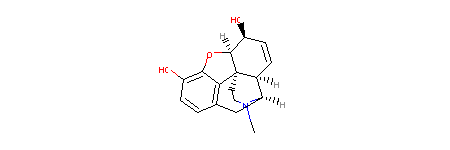

In [765]:
# Displying morphine's 2D strucure.
cpd_1 = Chem.MolFromSmiles('CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5') 
cpd_1

RDKit can be used to get the properties of compounds, below is the code to calculate the molecular weight for morphine.

In [766]:
# Run this cell.
# Molecular weight.
mw = Descriptors.MolWt(cpd_1)
mw

285.343

**Using code similar to the above cell, use `Descriptors.NumValenceElectrons()` to compute the number of valence electrons that morphine has.**

In [767]:
# Run this cell.
# Valence electrons count.
valence = Descriptors.NumValenceElectrons(cpd_1)
valence

110

Diacetylmorphine is a prodrug; when it enters the body, it is converted to morphine. Thus they have similar structures.

**Using the SMILES string given below for diacetylmorphine (heroin), calculate its molecular weight, the number of valence eletrons, and display its 2D structure. Use code similar to the example above for morphine.**

**SMILES (diacetylmorphine):** `'CC(OC1=C(O[C@@H]2[C@]34CCN(C)[C@@H]([C@@H]4C=C[C@@H]2OC(C)=O)C5)C3=C5C=C1)=O'`

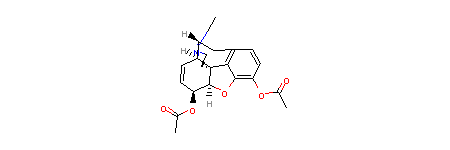

In [768]:
# Diacetylmorphine's 2D strucure.
cpd_2 = Chem.MolFromSmiles('CC(OC1=C(O[C@@H]2[C@]34CCN(C)[C@@H]([C@@H]4C=C[C@@H]2OC(C)=O)C5)C3=C5C=C1)=O') 
cpd_2

In [769]:
# Molecular weight.
mw = Descriptors.MolWt(cpd_2)
mw

369.4170000000002

In [770]:
# Valence electrons count.
valence = Descriptors.NumValenceElectrons(cpd_2)
valence

142

###  **Similar molecules**

The ability to quantitevly assess the similarity of molecules based on their structure is an extremely useful concept in the drug discovery process. It enables researchers to find more effective analogues of already existing drugs. Below, the similarity between **morphine** and **diacetylmorphine** is calculated, maximum similarity (same molecule) would yield a value of **1**.

In [771]:
# Run this cell.
ms = [cpd_1, cpd_2]
fps = [Chem.RDKFingerprint(x) for x in ms]
DataStructs.FingerprintSimilarity(fps[0], fps[1])

0.933291770573566

Using the built-in fingerprinting function from the cell above, we will attempt to write a program that will find the 3 most similar molecules to morphine from a large database of compounds and their respctive SMILES strings.

First the .csv file must read and processed. The header will not be required, and neither will the final cell (as it is empty). These will need to be removed.

**Using the `del ` function in the cell below, remove the the header and the bottom line (last index) from `lines`.**

**HINT:** Accessing the last element in a list was covered in session 4.

In [772]:
# Open, read and tailor the smiles database.
with open('./biochem_resources/smiles.csv') as f:
    lines = f.read().split('\n')
    print(lines[0])
    del lines[0]
    del lines[-1]

Name	Smiles


**Run the cell below.**

In [773]:
# This creates a new list, `molecules`.
molecules = []
for l in lines:
    elements = l.split('\t')
    molecules.append({
        'name': elements[0],
        'smiles': elements[1]
    })

**The function below, `nearest_3()` will loop through the `molecules` list and assess similarity to the query input using RDKit's `DataStructs.FingerprintSimilarity()` function. Run the cell, then read through the comments to gain insight into how the function works.**

In [774]:
# The function takes the input SMILES string and returns the most similar values.
def nearest_3(query_smiles):
   
    #Setting baseline similarities.
    max_similarity = 0
    max_similarity_2 = 0
    max_similarity_3 = 0
    
    # Converting the query molecule to the Mol format and getting the molecules fingerprint.
    query_fp = Chem.RDKFingerprint(Chem.MolFromSmiles(query_smiles))
    
    # Loop through the `molecules` database - `tdqm()` is to add a progress bar.
    for test_mol in tqdm(molecules, desc='BEST MATCH'):
        
        # Transformating each encountered variable into the necessary format.
        test_fp = Chem.RDKFingerprint(Chem.MolFromSmiles(test_mol['smiles']))
        similarity = DataStructs.FingerprintSimilarity(test_fp, query_fp)
        
        #This will continuously update the `best_mol` variable with the most similar molecule.
        #The similarity cannot be equal to 1 otherwise the loop will return the query molecule as most similar.
        if max_similarity < similarity < 1:
            max_similarity = similarity
            best_mol = test_mol
        
    #Repitition of the code to obtain the 2nd most similar molecule from the database    
    for test_mol_2 in tqdm(molecules, desc='SECOND MATCH'):
        
        
        test_fp_2 = Chem.RDKFingerprint(Chem.MolFromSmiles(test_mol_2['smiles']))
        similarity_2 = DataStructs.FingerprintSimilarity(test_fp_2, query_fp)    

        #Basically the same as the loop above, however the maximum similarity is now set to the "best match's" similarity
        #This ensures that the most similar molecule found this time will not include the "best match" from the first loop
        if  max_similarity_2 < similarity_2 < max_similarity:
            max_similarity_2 = similarity_2
            second_mol = test_mol_2  
    
    #Repitition of the code to obtain the 3rd most similar molecule from the database 
    for test_mol_3 in tqdm(molecules, desc='THIRD MATCH'):

        
        test_fp_3 = Chem.RDKFingerprint(Chem.MolFromSmiles(test_mol_3['smiles']))
        similarity_3 = DataStructs.FingerprintSimilarity(test_fp_3, query_fp)    


        if  max_similarity_3 < similarity_3 < max_similarity_2:
            max_similarity_3 = similarity_3
            third_mol = test_mol_3
            
    #The values that the function will return - TAKE NOTE
    return best_mol,second_mol, third_mol, max_similarity, max_similarity_2, max_similarity_3

**Store the SMILES string of morphine into a variable name of your choice.**

**SMILES (morphine):** `'CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5'`

In [775]:
# Store smiles string in a variable
morphine = 'CN1CC[C@]23C4=C5C=CC(O)=C4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5'

**Run the `nearest_3` function on the morphine SMILES string, store the result as `run_1`.** (It may take a few minutes)

In [776]:
# Remember to store the result in a variable called `run_` - This can all be done in 1 line.
run_1 = nearest_3(morphine)

**What is `run_1`'s `type()` ?**

In [777]:
#Find out what type() `run_1` is.
type(run_1)

tuple

**Print `run_1`.**

In [778]:
run_1

({'name': 'MORPHINE SULFATE',
  'smiles': 'CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5.CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5.O=S(=O)(O)O'},
 {'name': 'CODEINE MONOHYDRATE',
  'smiles': 'COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2)N(C)CC[C@]314.O'},
 {'name': 'NALORPHINE',
  'smiles': 'C=CCN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5'},
 0.9973351099267155,
 0.9940239043824701,
 0.993364299933643)

**Print the 2nd most similar molecule's results.**

**HINT:** Look at which values the function `return`'s, and print that index.

In [779]:
# Overall results summary for the best match.
run_1[0]

{'name': 'MORPHINE SULFATE',
 'smiles': 'CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5.CN1CC[C@]23c4c5ccc(O)c4O[C@H]2[C@@H](O)C=C[C@H]3[C@H]1C5.O=S(=O)(O)O'}

**Print the similarity (<1) of the 3rd most simlar molecule to the query.**

**HINT:** Look at which values the function `return`'s.

In [780]:
# Similarity for 3rd match.
run_1[5]

0.993364299933643

**Print the name of the most similar molecule found from the result.**

In [781]:
# HINT: view the result of this cell - how do you access elements from this type of data?
type(run_1[0])

dict

In [782]:
# Print the name of the most similar result.
run_1[0]['name']

'MORPHINE SULFATE'

**The cells below will produce a visual of the result - If there are any errors, make sure you have assigned the result of the function to `run_1`**

In [783]:
# Conversion of the results into an appropriate format to be drawn from.
query_m = Chem.MolFromSmiles(query_smiles)
match_m = Chem.MolFromSmiles(run_1[0]['smiles'])
match_2_m = Chem.MolFromSmiles(run_1[1]['smiles'])
match_3_m = Chem.MolFromSmiles(run_1[2]['smiles'])

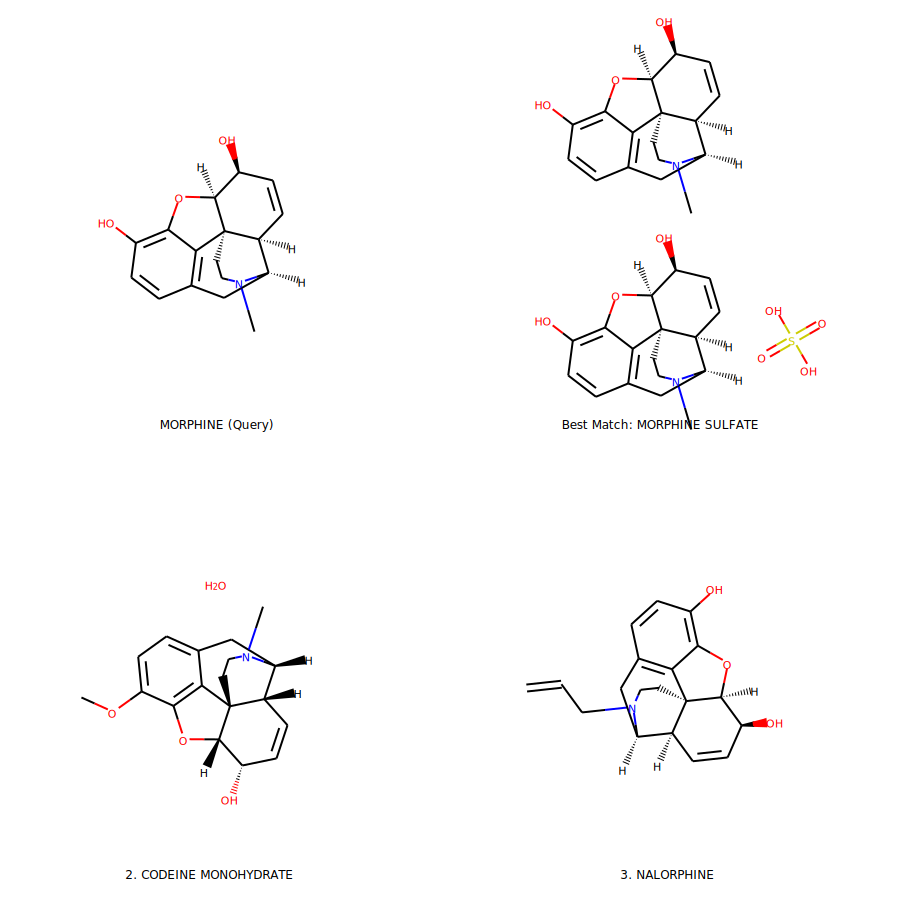

In [784]:
# Draws all the results and stores the images in a grid.
Draw.MolsToGridImage(
    (query_m, match_m, match_2_m, match_3_m),
    legends = ('MORPHINE (Query)','Best Match: '+ run_1[0]['name'],'2. '+ run_1[1]['name'],'3. '+ run_1[2]['name']),
    molsPerRow=2, subImgSize=(450, 450)
)